# Démonstration

Nous présentons notre implémentation de l'algorithme Random Forest. 


## De quoi s'agit-il ?
L'algorithme Random Forest est une méthode d'apprentissage automatique qui construit plusieurs arbres de décision et combine leurs prédictions pour obtenir des résultats plus précis et robustes. Il utilise l'échantillonnage aléatoire et la sélection aléatoire de variables pour réduire la corrélation entre les arbres.

## Exemple: Dataset eMnist digits
Le dataset eMnist Digits est un sous-ensemble du dataset eMnist spécifiquement conçu pour l'apprentissage et la validation des algorithmes de reconnaissance de chiffres manuscrits. Ce dataset contient 280 000 échantillons d'images de chiffres allant de 0 à 9 (10 classes différentes, avec 28 000 exemples par classe). Chaque image est en niveaux de gris et présente une résolution de 28x28 pixels.

### Chargement du dataset

In [1]:
from ias.Datasets import Emnist
from ias import RandomForest, DecisionTree, PCA, split_dataset
from ias.Metrics import accuracy_score, confusion_matrix, show_confusion_matrix

### Prétraitement

In [2]:
emnist_train_x, emnist_train_y, emnist_test_x, emnist_test_y = split_dataset(1000, Emnist)
pca = PCA(0.9)

pca.fit(emnist_train_x)
emnist_compressed_train_x = pca.compress(emnist_train_x)
emnist_compressed_test_x = pca.compress(emnist_test_x)

### Traitement par Random Forest

In [8]:
emnist_forest = RandomForest(tree_number=50, max_depth=7, training_subset_size=250, do_bagging=True)
emnist_forest.fit(emnist_compressed_train_x, emnist_train_y)

### Traitement par simple Decision Tree

In [9]:
emnist_tree = DecisionTree(max_depth=10, do_bagging=True, splitter="best")
emnist_tree.fit(emnist_compressed_train_x, emnist_train_y)

### Comparaison des résultats

Accuracy score : 0.490


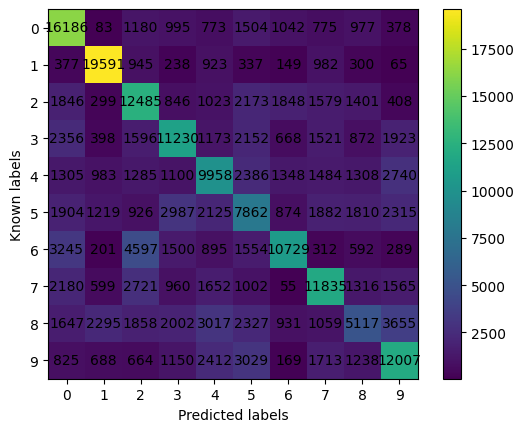

In [10]:
tree_prediction_y = emnist_tree.predict(emnist_compressed_test_x)
conf_matrix = confusion_matrix(Emnist.class_number, emnist_test_y, tree_prediction_y)
show_confusion_matrix(conf_matrix, Emnist.class_names)
print(f"Accuracy score : {accuracy_score(emnist_test_y, tree_prediction_y):.3f}")

Accuracy score : 0.812


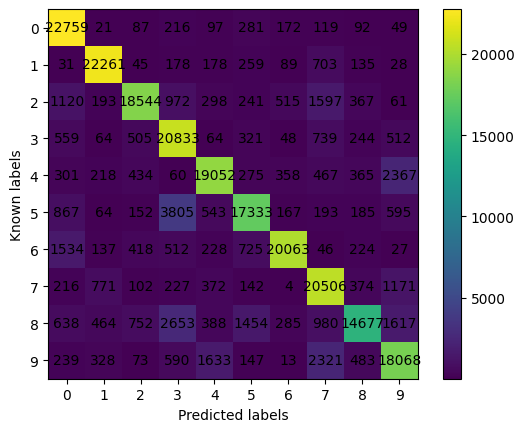

Accuracy score : 0.790


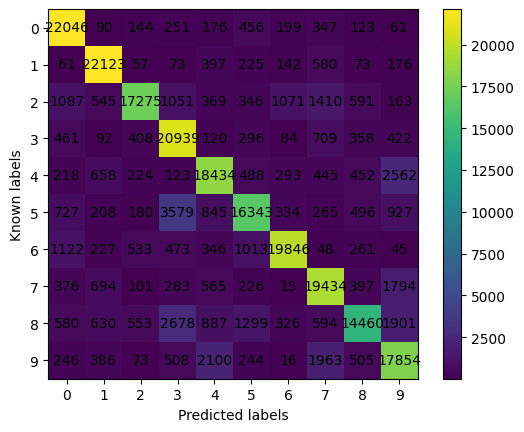

In [11]:
forest_prediction_y = emnist_forest.predict(emnist_compressed_test_x)
conf_matrix = confusion_matrix(Emnist.class_number, emnist_test_y, forest_prediction_y)
show_confusion_matrix(conf_matrix, Emnist.class_names)
print(f"Accuracy score : {accuracy_score(emnist_test_y, forest_prediction_y):.3f}")

### Conclusion

La `RandomForest` donne de bien meilleurs résultats qu'un simple `DecisionTree`.